In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymatgen.io.pwscf import PWInput
from pymatgen.core import Structure
from pymatgen.analysis.elasticity import *
from pymatgen.io.vasp.inputs import *
from pymatgen.core.tensors import symmetry_reduce
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import os

from simtool import getValidatedInputs, DB, findInstalledSimToolNotebooks, searchForSimTool
import nanohubremote as nr

In [2]:
auth_data = { 'grant_type' : 'tool' }
with open(os.environ["SESSIONDIR"]+"/resources") as file:
    lines = [line.split(" ", 1) for line in file.readlines()]
    properties = {line[0].strip(): line[1].strip() for line in lines if len(line)==2}
    auth_data["sessiontoken"] = properties["session_token"]
    auth_data["sessionnum"] = properties["sessionid"]
    
session = nr.Session(auth_data, url='https://nanohub.org/api')

In [19]:
tool = 'elasticdft'

mp_ls = ['mp-8062','mp-11714','mp-7631','mp-1002206']

revisions = [0]

data_list = {}
pd_ls = []

for mp in mp_ls:
    for revision in revisions:
        search = {
                'tool':tool,
                'filters':json.dumps([
                                      {'field':'input.mp_id','operation':'==','value':mp},
                                    ]),
                'results':json.dumps([
                                    'input.mp_id',
                                    'output.external_pressure',
                                    'output.elastic_tensor',
                                    'output.C11',
                                    'output.C12',
                                    'output.C13',
                                    'output.C33',
                                    'output.C44',
                                    'output.C66',
                                    'output.homogeneous_poisson',
                                    'output.bulk_modulus_voigt',
                                    'output.bulk_modulus_reuss',
                                    'output.bulk_modulus_vrh',
                                    'output.shear_modulus_voigt',
                                    'output.shear_modulus_reuss',
                                    'output.shear_modulus_vrh',
                                    'output.youngs_modulus'
                                    ]),    
                'limit':10000,    
                'revision':revision,
                'simtool' : 1
                 }

        req_json = session.requestPost('results/dbexplorer/search', data=search, timeout=60)
        req_json = req_json.json()
        data_list[f'{revision}'] = pd.DataFrame(req_json['results'])


        pd_ls.append(pd.concat([data_list[f'{revision}'] for revision in revisions], axis=0, ignore_index=True))
data = pd.concat(pd_ls)
data

,squid,revision,date,input.mp_id,output.external_pressure,output.elastic_tensor,output.C11,output.C12,output.C13,output.C33,output.C44,output.C66,output.homogeneous_poisson,output.bulk_modulus_voigt,output.bulk_modulus_reuss,output.bulk_modulus_vrh,output.shear_modulus_voigt,output.shear_modulus_reuss,output.shear_modulus_vrh,output.youngs_modulus
0,elasticdft/r13/12a4298cc263660e7db14ec53c55082...,13,2024-03-22 12:28:21.107634,mp-8062,-0.145,"[[390.18, 136.3, 136.26, 0, 1.1102230246252e-1...",390.18,136.36,136.36,390.06,244.490,244.480,0.168629,220.911111,220.911110,220.911110,197.460333,178.383411,187.921872,439.221748
1,elasticdft/r13/b6ee1f866a810d9eeffee7bca9ad758...,13,2024-03-22 12:29:25.61984,mp-8062,9.908,"[[428.02, 173.78, 173.92, -1.0487610779819e-14...",428.02,173.84,173.84,428.10,260.870,260.870,0.198106,258.577778,258.577781,258.577779,207.355333,183.576675,195.466004,468.378085
2,elasticdft/r13/a32c3e6e2ff27857d8359cc50807c2c...,13,2024-03-22 13:22:43.492762,mp-8062,49.956,"[[561.66, 315, 314.92, 0, -5.6843418860808e-14...",561.66,315.22,315.22,561.36,302.260,302.260,0.274421,397.193333,397.193333,397.193333,230.664000,191.168043,210.916022,537.591499
3,elasticdft/r13/4066f63dea964aacdae9fe1e6c54ee2...,13,2024-03-22 13:22:46.721244,mp-8062,19.909,"[[463.86, 210.4, 210.5, 3.5742075965572e-14, -...",463.86,210.48,210.48,463.94,274.220,274.220,0.222150,294.933333,294.933334,294.933334,215.214667,187.095542,201.155104,491.683411
4,elasticdft/r13/6405b5148901513dd0d4894c6ba7238...,13,2024-03-22 14:49:36.297156,mp-8062,100.010,"[[703.54, 479.14, 478.8, -1.1368683772162e-13,...",703.54,479.20,479.20,703.18,326.450,326.470,0.329612,553.826667,553.826685,553.826676,240.770667,185.060881,212.915774,566.190938
5,elasticdft/r13/1ac4d96d1f9724a1d2c3609e47e4fd0...,13,2024-03-25 06:37:06.157402,mp-8062,74.988,"[[633.54, 398.16, 398, -1.1368683772162e-13, 0...",633.54,398.18,398.18,633.34,316.700,316.700,0.305499,476.562222,476.562220,476.562221,237.101333,188.906089,213.003711,556.152097
6,elasticdft/r13/38ac716690c6d14b4c56b21b384304d...,13,2024-03-26 12:47:01.393006,mp-8062,-0.145,"[[390.18, 136.3, 136.24, 0, 1.1102230246252e-1...",390.18,136.36,136.36,390.06,244.490,244.480,0.168619,220.906667,220.906667,220.906667,197.463000,178.387055,187.925027,439.225541
0,elasticdft/r13/6d5e4f695af2d213a8f467719d76eb8...,13,2024-03-25 07:43:38.678295,mp-11714,0.000,"[[498.54, 113.04, 57.1, -0.02, 0, 0], [112.92,...",498.54,112.92,57.04,547.30,157.140,192.210,0.171860,222.053333,222.045765,222.049549,189.099333,183.965028,186.532181,437.179385
1,elasticdft/r13/50064725c8f2e904e23446ce3e8e059...,13,2024-03-25 07:49:39.445538,mp-11714,10.000,"[[548.4, 149.26, 84.86, 0.014999999999982, -9....",548.40,149.06,84.64,604.48,161.190,199.080,0.201829,259.800000,259.790562,259.795281,196.417333,190.310524,193.363929,464.780706
2,elasticdft/r13/7af722d21d71233634eb48244cb00ae...,13,2024-03-25 08:50:22.049442,mp-11714,19.999,"[[594.4, 184.58, 112.92, -0.005000000000003, -...",594.40,184.56,112.82,654.54,163.910,203.960,0.226041,295.991111,295.972755,295.981933,201.893333,194.930292,198.411813,486.521934


In [53]:
data['G_range'] = data['output.shear_modulus_voigt'] - data['output.shear_modulus_reuss']

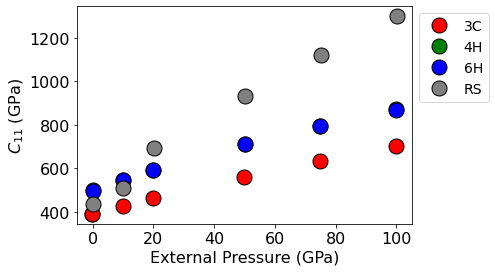

In [36]:
sic_poly = ['3C','4H','6H','RS']
colors = ['red','green','blue','grey']
for i in range(len(mp_ls)):
    tmp = data[data['input.mp_id']==mp_ls[i]]
    plt.plot(tmp['output.external_pressure'],tmp['output.C11'],'o',color=colors[i],markersize=15,markeredgecolor='k',label=sic_poly[i])
plt.ylabel('$C_{11}$ (GPa)',fontsize=16)
plt.xlabel('External Pressure (GPa)',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.show()

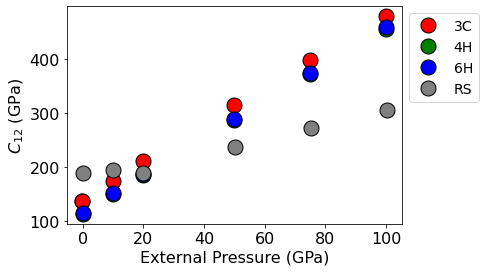

In [37]:
sic_poly = ['3C','4H','6H','RS']
colors = ['red','green','blue','grey']
for i in range(len(mp_ls)):
    tmp = data[data['input.mp_id']==mp_ls[i]]
    plt.plot(tmp['output.external_pressure'],tmp['output.C12'],'o',color=colors[i],markersize=15,markeredgecolor='k',label=sic_poly[i])
plt.ylabel('$C_{12}$ (GPa)',fontsize=16)
plt.xlabel('External Pressure (GPa)',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.show()

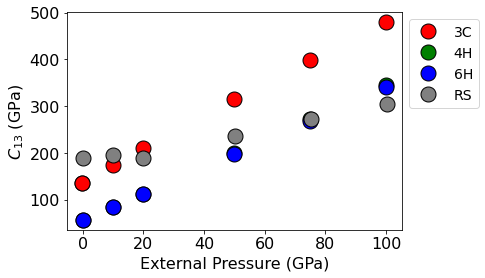

In [38]:
sic_poly = ['3C','4H','6H','RS']
colors = ['red','green','blue','grey']
for i in range(len(mp_ls)):
    tmp = data[data['input.mp_id']==mp_ls[i]]
    plt.plot(tmp['output.external_pressure'],tmp['output.C13'],'o',color=colors[i],markersize=15,markeredgecolor='k',label=sic_poly[i])
plt.ylabel('$C_{13}$ (GPa)',fontsize=16)
plt.xlabel('External Pressure (GPa)',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.show()

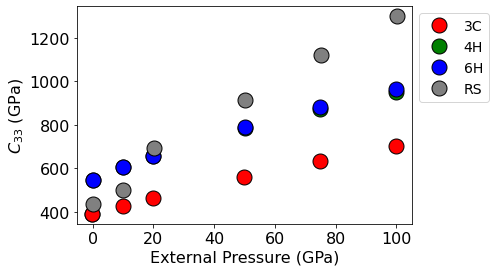

In [39]:
sic_poly = ['3C','4H','6H','RS']
colors = ['red','green','blue','grey']
for i in range(len(mp_ls)):
    tmp = data[data['input.mp_id']==mp_ls[i]]
    plt.plot(tmp['output.external_pressure'],tmp['output.C33'],'o',color=colors[i],markersize=15,markeredgecolor='k',label=sic_poly[i])
plt.ylabel('$C_{33}$ (GPa)',fontsize=16)
plt.xlabel('External Pressure (GPa)',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.show()

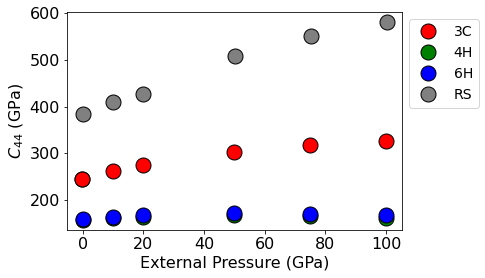

In [41]:
sic_poly = ['3C','4H','6H','RS']
colors = ['red','green','blue','grey']
for i in range(len(mp_ls)):
    tmp = data[data['input.mp_id']==mp_ls[i]]
    plt.plot(tmp['output.external_pressure'],tmp['output.C44'],'o',color=colors[i],markersize=15,markeredgecolor='k',label=sic_poly[i])
plt.ylabel('$C_{44}$ (GPa)',fontsize=16)
plt.xlabel('External Pressure (GPa)',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.show()

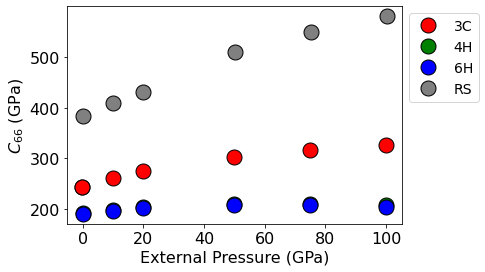

In [42]:
sic_poly = ['3C','4H','6H','RS']
colors = ['red','green','blue','grey']
for i in range(len(mp_ls)):
    tmp = data[data['input.mp_id']==mp_ls[i]]
    plt.plot(tmp['output.external_pressure'],tmp['output.C66'],'o',color=colors[i],markersize=15,markeredgecolor='k',label=sic_poly[i])
plt.ylabel('$C_{66}$ (GPa)',fontsize=16)
plt.xlabel('External Pressure (GPa)',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.show()

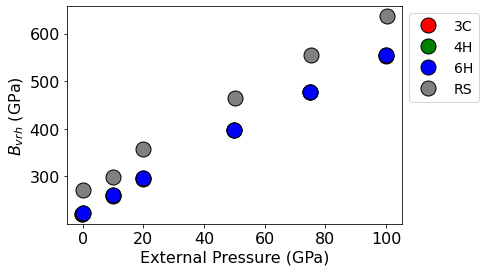

In [48]:
sic_poly = ['3C','4H','6H','RS']
colors = ['red','green','blue','grey']
for i in range(len(mp_ls)):
    tmp = data[data['input.mp_id']==mp_ls[i]]
    plt.plot(tmp['output.external_pressure'],tmp['output.bulk_modulus_vrh'],'o',color=colors[i],markersize=15,markeredgecolor='k',label=sic_poly[i])
plt.ylabel('$B_{vrh}$ (GPa)',fontsize=16)
plt.xlabel('External Pressure (GPa)',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.show()

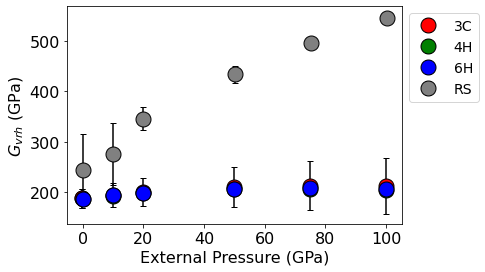

In [61]:
sic_poly = ['3C','4H','6H','RS']
colors = ['red','green','blue','grey']
for i in range(len(mp_ls)):
    tmp = data[data['input.mp_id']==mp_ls[i]]
    plt.errorbar(x=tmp['output.external_pressure'],y=tmp['output.shear_modulus_vrh'],yerr=tmp['G_range'],fmt='o',color=colors[i],ecolor='k',capsize=3,markersize=15,markeredgecolor='k',label=sic_poly[i])
plt.ylabel('$G_{vrh}$ (GPa)',fontsize=16)
plt.xlabel('External Pressure (GPa)',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.show()

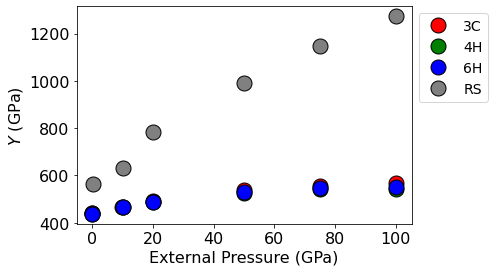

In [57]:
sic_poly = ['3C','4H','6H','RS']
colors = ['red','green','blue','grey']
for i in range(len(mp_ls)):
    tmp = data[data['input.mp_id']==mp_ls[i]]
    plt.plot(tmp['output.external_pressure'],tmp['output.youngs_modulus'],'o',color=colors[i],markersize=15,markeredgecolor='k',label=sic_poly[i])
plt.ylabel('$Y$ (GPa)',fontsize=16)
plt.xlabel('External Pressure (GPa)',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.show()

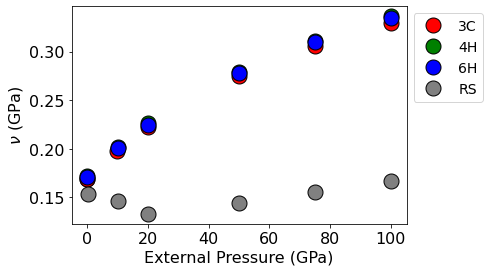

In [50]:
sic_poly = ['3C','4H','6H','RS']
colors = ['red','green','blue','grey']
for i in range(len(mp_ls)):
    tmp = data[data['input.mp_id']==mp_ls[i]]
    plt.plot(tmp['output.external_pressure'],tmp['output.homogeneous_poisson'],'o',color=colors[i],markersize=15,markeredgecolor='k',label=sic_poly[i])
plt.ylabel(r'$\nu$ (GPa)',fontsize=16)
plt.xlabel('External Pressure (GPa)',fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=14,bbox_to_anchor=(1,1))
plt.show()